In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
east_1_df = pd.read_csv('../data/Huawei-East-1.csv')
east_1_df

,vmid,cpu,memory,time,type
0,0,4,16,0.0,0
1,1,4,16,2.0,0
2,2,4,16,2.0,0
3,3,1,1,55.0,0
4,4,2,4,83.0,0
...,...,...,...,...,...
241738,125428,16,32,2678112.0,1
241739,125427,1,1,2678114.0,1
241740,125420,1,1,2678153.0,1
241741,125425,1,1,2678188.0,1


In [3]:
2678191.0 / 60 / 60 / 24

30.99758101851852

In [4]:
east_1_df['type'].value_counts()

0    125430
1    116313
Name: type, dtype: int64

<AxesSubplot:>

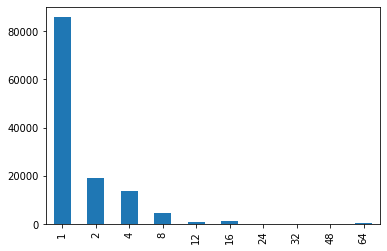

In [5]:
cpu_value_counts = east_1_df[east_1_df['type'] == 0]['cpu'].value_counts().sort_index()
cpu_value_counts.plot.bar()

<AxesSubplot:>

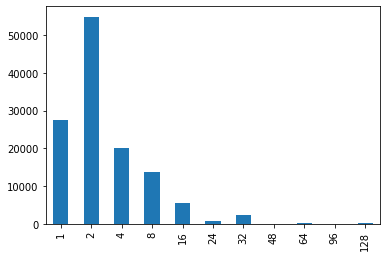

In [6]:
memory_value_count = east_1_df[east_1_df['type'] == 0]['memory'].value_counts().sort_index()
memory_value_count.plot.bar()

<AxesSubplot:xlabel='cpu,memory,flavor'>

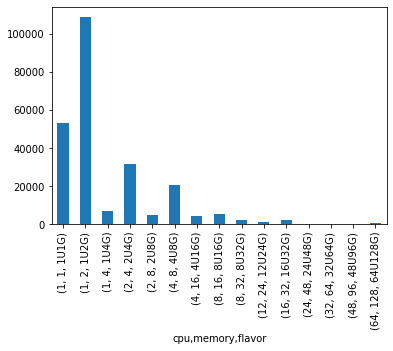

In [7]:
east_1_df['flavor'] = east_1_df.apply(lambda x: '{}U{}G'.format(int(x['cpu']), int(x['memory'])), axis=1)
flavor_counts = east_1_df[['cpu', 'memory', 'flavor']].value_counts()
flavor_counts.sort_index().plot.bar()

In [8]:
east_1_df['op'] = east_1_df.apply(lambda x: 1 if x['type'] == 0 else -1, axis=1)
east_1_df['op_cpu'] = east_1_df['cpu'] * east_1_df['op']
east_1_df['op_memory'] = east_1_df['memory'] * east_1_df['op']
east_1_df

,vmid,cpu,memory,time,type,flavor,op,op_cpu,op_memory
0,0,4,16,0.0,0,4U16G,1,4,16
1,1,4,16,2.0,0,4U16G,1,4,16
2,2,4,16,2.0,0,4U16G,1,4,16
3,3,1,1,55.0,0,1U1G,1,1,1
4,4,2,4,83.0,0,2U4G,1,2,4
...,...,...,...,...,...,...,...,...,...
241738,125428,16,32,2678112.0,1,16U32G,-1,-16,-32
241739,125427,1,1,2678114.0,1,1U1G,-1,-1,-1
241740,125420,1,1,2678153.0,1,1U1G,-1,-1,-1
241741,125425,1,1,2678188.0,1,1U1G,-1,-1,-1


In [9]:
east_1_df['cum_vm'] = east_1_df['op'].cumsum()
east_1_df['cum_cpu'] = east_1_df['op_cpu'].cumsum()
east_1_df['cum_memeory'] = east_1_df['op_memory'].cumsum()
east_1_df

,vmid,cpu,memory,time,type,flavor,op,op_cpu,op_memory,cum_vm,cum_cpu,cum_memeory
0,0,4,16,0.0,0,4U16G,1,4,16,1,4,16
1,1,4,16,2.0,0,4U16G,1,4,16,2,8,32
2,2,4,16,2.0,0,4U16G,1,4,16,3,12,48
3,3,1,1,55.0,0,1U1G,1,1,1,4,13,49
4,4,2,4,83.0,0,2U4G,1,2,4,5,15,53
...,...,...,...,...,...,...,...,...,...,...,...,...
241738,125428,16,32,2678112.0,1,16U32G,-1,-16,-32,9119,33743,71509
241739,125427,1,1,2678114.0,1,1U1G,-1,-1,-1,9118,33742,71508
241740,125420,1,1,2678153.0,1,1U1G,-1,-1,-1,9117,33741,71507
241741,125425,1,1,2678188.0,1,1U1G,-1,-1,-1,9116,33740,71506
